In [1]:
import magma as m
m.set_mantle_target("coreir")
import mantle

class FullAdder(m.Circuit):
    name = "FullAdder"
    IO = ["a", m.In(m.Bit), "b", m.In(m.Bit), "cin", m.In(m.Bit),
          "out", m.Out(m.Bit), "cout", m.Out(m.Bit)]
    @classmethod
    def definition(io):
        # Generate the sum
        _sum = io.a ^ io.b ^ io.cin
        m.wire(_sum, io.out)
        # Generate the carry
        carry = (io.a & io.b) | (io.b & io.cin) | (io.a & io.cin)
        m.wire(carry, io.cout)

In [2]:
from magma.backend.verilog import compile as compile_verilog

print(compile_verilog(FullAdder))

compiling xor_wrapped
compiling fold_xor3None
compiling Or3xNone
compiling and_wrapped
compiling FullAdder
module xor_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_xor inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module fold_xor3None (input  I0, input  I1, input  I2, output  O);
wire  inst0_O;
wire  inst1_O;
xor_wrapped inst0 (.I0(I0), .I1(I1), .O(inst0_O));
xor_wrapped inst1 (.I0(inst0_O), .I1(I2), .O(inst1_O));
assign O = inst1_O;
endmodule

module Or3xNone (input  I0, input  I1, input  I2, output  O);
wire  inst0_out;
orr inst0 (.in({I2,I1,I0}), .out(inst0_out));
assign O = inst0_out;
endmodule

module and_wrapped (input  I0, input  I1, output  O);
wire  inst0_out;
coreir_and inst0 (.in0(I0), .in1(I1), .out(inst0_out));
assign O = inst0_out;
endmodule

module FullAdder (input  I0, input  I1, input  CIN, output  O, output  COUT);
wire  inst0_O;
wire  inst1_O;
wire  inst2_O;
wire  inst3_O;
wire  inst4_O;
fold_xor3None inst0 (.I0(I0

In [3]:
from magma.backend.coreir_ import compile as compile_coreir

compile_coreir(FullAdder, "build/FullAdder.json")
with open("build/FullAdder.json", "r") as f:
    print(f.read())

{"top":"global.FullAdder",
"namespaces":{
  "global":{
    "modules":{
      "FullAdder":{
        "type":["Record",[
          ["I0","BitIn"],
          ["I1","BitIn"],
          ["CIN","BitIn"],
          ["O","Bit"],
          ["COUT","Bit"]
        ]],
        "instances":{
          "inst0":{
            "modref":"global.fold_xor3None"
          },
          "inst1":{
            "modref":"global.Or3xNone"
          },
          "inst2":{
            "modref":"global.and_wrapped"
          },
          "inst3":{
            "modref":"global.and_wrapped"
          },
          "inst4":{
            "modref":"global.and_wrapped"
          }
        },
        "connections":[
          ["self.I0","inst0.I0"],
          ["self.I1","inst0.I1"],
          ["self.CIN","inst0.I2"],
          ["self.O","inst0.O"],
          ["inst2.O","inst1.I0"],
          ["inst3.O","inst1.I1"],
          ["inst4.O","inst1.I2"],
          ["self.COUT","inst1.O"],
          ["self.I0","inst2.I0"],
       

In [4]:
from fault.test_vectors import generate_simulator_test_vectors

test_vectors = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1],
    [1, 1, 1, 1, 1]
]

tests = generate_simulator_test_vectors(FullAdder)
print(tests)
print( "Success" if tests == test_vectors else "Failure" )

[[0, 0, 0, 0, 0], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 0, 1], [1, 0, 0, 1, 0], [1, 0, 1, 0, 1], [1, 1, 0, 0, 1], [1, 1, 1, 1, 1]]
Success


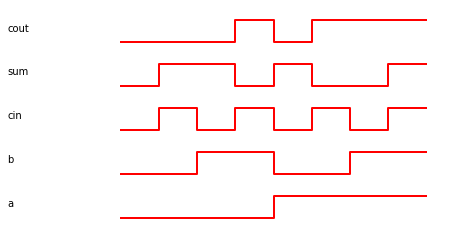

In [5]:
from magma.waveform import waveform

waveform(tests, ["a", "b", "cin", "sum", "cout"])